In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [24]:
df=pd.read_csv(r'D:\Kaggle Comp\Gender classification\voice.csv')

In [25]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [26]:
df.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [27]:
x=df.drop('label',axis=1)
y=df['label']

In [28]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
y=en.fit_transform(y)

In [29]:
x.isna().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
dtype: bool

In [30]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [32]:
df.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [33]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [34]:
from feature_engine.selection import DropDuplicateFeatures,DropConstantFeatures,DropCorrelatedFeatures,SmartCorrelatedSelection

In [13]:
#calculating Inter quartile ranges for all the columns
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

meanfreq    0.035484
sd          0.025067
median      0.041026
Q25         0.064852
Q75         0.034914
IQR         0.071615
skew        1.282125
kurt        7.979358
sp.ent      0.066902
sfm         0.275636
mode        0.103088
centroid    0.035484
meanfun     0.052582
minfun      0.029681
maxfun      0.023488
meandom     0.757338
mindom      0.062500
maxdom      4.937500
dfrange     4.947266
modindx     0.109417
dtype: float64


In [15]:
x = x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
x=(x-x.mean())/x.std()

In [36]:
x.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03
mean,1.343797e-15,1.513240e-15,9.425681e-16,-3.610958e-15,-2.819595e-14,7.174396e-16,-7.311772e-16,-5.639253e-16,2.494932e-14,-4.150230e-15,-8.958182e-16,1.343797e-15,-2.425038e-15,-4.596211e-15,-2.861484e-14,-3.041829e-15,3.688197e-15,-2.761540e-16,2.312965e-17,7.983232e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.731066e+00,-2.327777e+00,-4.803229e+00,-2.880601e+00,-7.691381e+00,-1.630357e+00,-7.070892e-01,-2.556907e-01,-3.478836e+00,-2.091807e+00,-2.140872e+00,-4.731066e+00,-2.700601e+00,-1.406176e+00,-5.178304e+00,-1.563958e+00,-7.545755e-01,-1.431196e+00,-1.418913e+00,-1.454543e+00
25%,-5.763944e-01,-9.111334e-01,-4.408165e-01,-6.033124e-01,-6.776157e-01,-9.758452e-01,-3.515125e-01,-2.290019e-01,-7.406945e-01,-8.459608e-01,-6.122303e-01,-5.763944e-01,-7.989074e-01,-9.666296e-01,-1.620488e-01,-7.794727e-01,-7.082925e-01,-8.454507e-01,-8.379759e-01,-6.193636e-01
50%,1.314199e-01,1.218547e-01,1.213335e-01,-3.475208e-03,3.888670e-02,2.330498e-01,-2.223937e-01,-2.093699e-01,1.476175e-01,-6.692869e-02,2.761141e-01,1.314199e-01,-7.083289e-02,4.842729e-01,4.104155e-01,-1.207455e-01,-4.614500e-01,-1.564521e-02,-1.401041e-02,-2.879298e-01
75%,6.096510e-01,5.941816e-01,6.874959e-01,7.289110e-01,7.993273e-01,6.980735e-01,-4.916214e-02,-1.698642e-01,7.467041e-01,7.067315e-01,7.230590e-01,6.096510e-01,8.287991e-01,5.776489e-01,6.188852e-01,6.625126e-01,2.790774e-01,5.567874e-01,5.674817e-01,2.966132e-01
max,2.346999e+00,3.491858e+00,2.079304e+00,2.195809e+00,2.060318e+00,3.924821e+00,7.448431e+00,9.434944e+00,1.931313e+00,2.448833e+00,1.485929e+00,2.346999e+00,2.935500e+00,8.703446e+00,6.739858e-01,4.052648e+00,6.419284e+00,4.776814e+00,4.786629e+00,6.350730e+00


In [16]:
from sklearn.svm import SVC

In [37]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([('Constant',DropConstantFeatures(tol=1)),('Duplicate',DropDuplicateFeatures()),('Correlated',SmartCorrelatedSelection(threshold=0.95,estimator=SVC))])

In [18]:
clf=SVC(random_state=0)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [40]:
xtrain.shape

(2376, 20)

In [41]:
ytrain.shape

(2376,)

In [42]:
xtrainnew=pipe.fit_transform(xtrain)
xtestnew=pipe.fit_transform(xtest)

In [22]:
xtrainnew.shape

(2376, 17)

In [23]:
clf.fit(xtrainnew,ytrain)

SVC(random_state=0)

In [24]:
pred=clf.predict(xtestnew)

In [38]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [26]:
accuracy_score(ytest,pred)

0.9772727272727273

In [27]:
confusion_matrix(ytest,pred)

array([[382,   6],
       [ 12, 392]], dtype=int64)

hyperparamter tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameters=[{'gamma':[0.01,0.1,0.5,0.8,1,10],'C':[int(i) for i in np.linspace(start=1,stop=100,num=11)]}]

In [30]:
grid=GridSearchCV(clf,param_grid=parameters,cv=4,verbose=1)

In [ ]:
grid.fit(xtrainnew,ytrain)

In [32]:
grid.best_estimator_

SVC(C=10, gamma=0.1, random_state=0)

In [33]:
grid.cv_results_

{'mean_fit_time': array([0.0357278 , 0.0349952 , 0.13783532, 0.15830266, 0.16793156,
        0.18746167, 0.02343214, 0.03124195, 0.14059329, 0.16207659,
        0.16402715, 0.23431444, 0.03905326, 0.05076993, 0.20698285,
        0.19526666, 0.22650999, 0.23212367, 0.03514838, 0.03905773,
        0.16856211, 0.19472086, 0.19382983, 0.25892127, 0.03905308,
        0.04686368, 0.18355376, 0.24994725, 0.21527606, 0.22799909,
        0.02734405, 0.03906059, 0.16011781, 0.19136381, 0.20307887,
        0.22259122, 0.03124225, 0.03514171, 0.1640234 , 0.18746001,
        0.19917196, 0.21479261, 0.03124058, 0.0372895 , 0.16012591,
        0.1874575 , 0.18746203, 0.22651172, 0.03514701, 0.04296297,
        0.16011268, 0.17574042, 0.18355513, 0.21478587, 0.03514153,
        0.03905338, 0.14839625, 0.1757459 , 0.19136196, 0.2069878 ,
        0.02733648, 0.0390417 , 0.16012627, 0.18745112, 0.18518841,
        0.21478879]),
 'std_fit_time': array([4.63434900e-03, 6.85604250e-03, 4.77859061e-03, 8.360

In [83]:
clf1=SVC(gamma=0.1,C=10,random_state=0)

In [84]:
clf1.fit(xtrainnew,ytrain)

SVC(C=10, gamma=0.1, random_state=0)

In [85]:
predtrain=clf1.predict(xtrainnew)

In [86]:
#training accuracy
accuracy_score(ytrain,predtrain)

0.9974747474747475

In [87]:
pred2=clf1.predict(xtestnew)

In [88]:
#test accuracy
accuracy_score(ytest,pred2)

0.98989898989899

In [89]:
confusion_matrix(ytest,pred2)

array([[414,   2],
       [  6, 370]], dtype=int64)

In [90]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       416
           1       0.99      0.98      0.99       376

    accuracy                           0.99       792
   macro avg       0.99      0.99      0.99       792
weighted avg       0.99      0.99      0.99       792



## Linear Seperability

In [91]:
xx=x
yy=y

In [92]:
xxnew=pipe.fit_transform(xx)

Checking the linear seperability of the data by training the linear SVM model with high penalty parameter value over all data

Doing so will create a linear decision boundary such that the margins are very close to eachother leading to overfitting

In [93]:
svmlinear=SVC(kernel='linear',C=1000,random_state=0)

In [94]:
svmlinear.fit(xx,yy)

SVC(C=1000, kernel='linear', random_state=0)

In [95]:
predddd=svmlinear.predict(xx)

In [96]:
accuracy_score(yy,predddd)

0.9763257575757576

In [97]:
confusion_matrix(yy,predddd)

array([[1547,   37],
       [  38, 1546]], dtype=int64)

In [98]:
print(classification_report(yy,predddd))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1584
           1       0.98      0.98      0.98      1584

    accuracy                           0.98      3168
   macro avg       0.98      0.98      0.98      3168
weighted avg       0.98      0.98      0.98      3168



Also training the single layer perceptron model to for the same purpose(i.e. linear seperability)

In [99]:
from sklearn.linear_model import Perceptron

In [100]:
perceptron=Perceptron(random_state=0)

In [101]:
perceptron.fit(xx,yy)

Perceptron()

In [102]:
predicted=perceptron.predict(xx)

accuracy might be good in both the cases but on observing the confusion matrix we can see there are significant no.of FP and FN

In [103]:
confusion_matrix(yy,predicted)

array([[1487,   97],
       [  38, 1546]], dtype=int64)

In [138]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(xtrainnew,ytrain)
predlor=lor.predict(xtestnew)
print('accuracy: ',accuracy_score(ytest,predlor))
print('confusion matrix\n',confusion_matrix(ytest,predlor))
print('classification report\n',classification_report(ytest,predlor))

accuracy:  0.976010101010101
confusion matrix
 [[402  14]
 [  5 371]]
classification report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       416
           1       0.96      0.99      0.98       376

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [53]:
c=x.values[:,:2]
c[0]

array([-4.04860892,  0.42728785])

In [43]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
vv=sca.fit_transform(x)
pca = PCA(n_components=5)
Xreduced = pca.fit_transform(vv)
pca.explained_variance_ratio_

array([0.45216391, 0.11870609, 0.10909939, 0.07619763, 0.05293938])

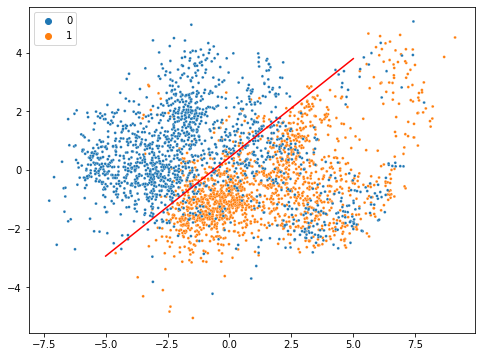

In [58]:
plt.figure(figsize=(8, 6))
# Plotting our two-features-space
sns.scatterplot(x=Xreduced[:, 0], 
                y=Xreduced[:, 1], 
                hue=y, 
                s=8);
# Constructing a hyperplane using a formula.
w = model.coef_[0]           # w consists of 2 elements
b = model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-5, 5)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

## RandomForest

In [92]:
from sklearn.ensemble import RandomForestClassifier
RC=RandomForestClassifier()

In [105]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import RandomizedSearchCV
import time

In [33]:
Rparams=[{'n_estimators':[int(i) for i in np.linspace(100,2000,num=20)],'max_features':['auto','sqrt'],'max_depth':[int(x) for x in np.linspace(10,100,num=10)],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'bootstrap':[True,False]}]

In [35]:
grid2=RandomizedSearchCV(RandomForestClassifier(),param_distributions=Rparams,cv=4,verbose=1)

In [36]:
t1=time.time
grid2.fit(xtrainnew,ytrain)
t2=time.time

Fitting 4 folds for each of 10 candidates, totalling 40 fits


C:\Users\nitin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [37]:
grid2.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='auto',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1800)

In [107]:
RC=RandomForestClassifier(max_depth=80, min_samples_leaf=2, n_estimators=1800,max_features='auto',min_samples_split=5)
RC.fit(xtrainnew,ytrain)

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=80, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1800)

In [108]:
pred111=RC.predict(xtestnew)

In [109]:
accuracy_score(ytest,pred111)

0.9810606060606061

In [110]:
confusion_matrix(ytest,pred111)

array([[408,   8],
       [  7, 369]], dtype=int64)

In [111]:
print(classification_report(ytest,pred111))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       416
           1       0.98      0.98      0.98       376

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [56]:
[int(x) for x in np.linspace(10,100,num=10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

## Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt=DecisionTreeClassifier()

In [35]:
paramss = {'max_leaf_nodes': list(range(2, 101,2)),'max_depth':[int(x) for x in np.linspace(10,100,num=10)],'criterion':['gini','log_loss','entropy']}

In [36]:
griddt=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=paramss,cv=4,verbose=1)

In [37]:
griddt.fit(xtrainnew,ytrain)

Fitting 4 folds for each of 1500 candidates, totalling 6000 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                            22, 24, 26, 28, 30, 32, 34, 36, 38,
                                            40, 42, 44, 46, 48, 50, 52, 54, 56,
                                            58, 60, ...]},
             verbose=1)

In [152]:
griddt.best_estimator_

DecisionTreeClassifier(max_depth=50, max_leaf_nodes=37, min_samples_split=3)

In [143]:
griddt.cv_results_

{'mean_fit_time': array([0.00768   , 0.01373774, 0.01738375, 0.02295762, 0.02801746,
        0.02336901, 0.03309709, 0.02512544, 0.02753496, 0.03129524,
        0.03098631, 0.03639245, 0.03556943, 0.039612  , 0.0368557 ,
        0.03560054, 0.03754878, 0.03237188, 0.03425831, 0.03943443,
        0.04072231, 0.0381434 , 0.0447973 , 0.03745455, 0.02935791,
        0.0401904 , 0.03617942, 0.03437299, 0.036906  , 0.04156029,
        0.0156315 , 0.01589352, 0.0133695 , 0.02383685, 0.02062672,
        0.02376163, 0.03170252, 0.03106588, 0.03556126, 0.03240037,
        0.03487998, 0.03923112, 0.03968924, 0.03166276, 0.03938133,
        0.03663963, 0.03786856, 0.03521127, 0.03650552, 0.03215635,
        0.03957206, 0.04377782, 0.03469461, 0.03606111, 0.03903621,
        0.03920132, 0.03614163, 0.03781766, 0.0373733 , 0.03896838,
        0.01604551, 0.01954204, 0.01229262, 0.02935147, 0.0207817 ,
        0.02538443, 0.03031331, 0.03583264, 0.01937258, 0.04359168,
        0.0313884 , 0.03456956,

In [161]:
DTT=DecisionTreeClassifier(max_depth=50,max_leaf_nodes=37,min_samples_split=3)

In [162]:
DTT.fit(xtrainnew,ytrain)

DecisionTreeClassifier(max_depth=50, max_leaf_nodes=37, min_samples_split=3)

In [163]:
preddt=DTT.predict(xtestnew)

In [164]:
accuracy_score(ytest,preddt)

0.9696969696969697

In [148]:
confusion_matrix(ytest,preddt)

array([[404,  12],
       [ 11, 365]], dtype=int64)

In [133]:
print(classification_report(ytest,preddt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       416
           1       0.97      0.97      0.97       376

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



## AutoML

In [23]:
from evalml.preprocessing import split_data

In [24]:
xtrain,xtest,ytrain,ytest=split_data(x,y,problem_type='binary')

In [25]:
from evalml.automl import AutoMLSearch
auto=AutoMLSearch(xtrain,ytrain,problem_type='binary')
auto.search()

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be re

{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:05',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer': '00:01',
  'Total time of batch': '00:06'},
 2: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler + RF Classifier Select From Model': '00:02',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + RF Classifier Select From Model': '00:01',
  'Total time of batch': '00:04'},
 3: {'Decision Tree Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'LightGBM Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'Extra Trees Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'E

In [26]:
auto.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,10,XGBoost Classifier w/ Label Encoder + Replace ...,10,0.080055,0.080055,0.038845,99.536801,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,4,Random Forest Classifier w/ Label Encoder + Re...,4,0.081984,0.081984,0.020839,99.525639,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,LightGBM Classifier w/ Label Encoder + Replace...,6,0.090710,0.090710,0.048392,99.475154,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.092527,0.092527,0.018080,99.464641,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,1,Logistic Regression Classifier w/ Label Encode...,1,0.097014,0.097014,0.024713,99.438679,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,3,Logistic Regression Classifier w/ Label Encode...,3,0.101888,0.101888,0.022171,99.410477,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,8,Elastic Net Classifier w/ Label Encoder + Repl...,8,0.101898,0.101898,0.022871,99.410417,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,7,Extra Trees Classifier w/ Label Encoder + Repl...,7,0.175921,0.175921,0.015212,98.982127,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,9,CatBoost Classifier w/ Label Encoder + Replace...,9,0.507259,0.507259,0.003958,97.065010,False,"{'Label Encoder': {'positive_label': None}, 'I..."
9,5,Decision Tree Classifier w/ Label Encoder + Re...,5,0.893653,0.893653,0.259414,94.829339,False,"{'Label Encoder': {'positive_label': None}, 'I..."


In [27]:
auto.describe_pipeline(auto.rankings['id'][0])


*******************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*******************************************************************************************************************


* XGBoost Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* XGBoost Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer *


*******************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*******************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: XGBoost


INFO:evalml.pipelines.pipeline_base.describe:Model Family: XGBoost


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Replace Nullable Types Transformer


INFO:evalml.pipelines.component_graph.describe:2. Replace Nullable Types Transformer


3. Imputer


INFO:evalml.pipelines.component_graph.describe:3. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


4. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:4. Select Columns Transformer


	 * columns : ['meanfreq', 'sd', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'meandom', 'mindom']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['meanfreq', 'sd', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'meandom', 'mindom']


5. XGBoost Classifier


INFO:evalml.pipelines.component_graph.describe:5. XGBoost Classifier


	 * eta : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * eta : 0.1


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_child_weight : 1


INFO:evalml.pipelines.components.component_base.describe:	 * min_child_weight : 1


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * eval_metric : logloss


INFO:evalml.pipelines.components.component_base.describe:	 * eval_metric : logloss


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 1.8 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 1.8 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.078       0.948 0.993 0.996      0.972 0.974                     0.974            0.974      1,689          845
1                      0.120       0.941 0.986 0.993      0.967 0.971                     0.970            0.970      1,689          845
2                      0.042       0.969 0.998 0.999      0.979 0.985                     0.985            0.985      1,690          844
mean                   0.080       0.953 0.992 0.996      0.973 0.976                     0.976            0.976          -            -
std                    0.039       0.015 0.006 0.003      0.006 0.007                     0.007            0.007          -            -
coef of var            0.485       0.016 0.006 0.003      0.006 0.008                     0.008            0.008          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.078       0.948 0.993 0.996      0.972 0.974                     0.974            0.974      1,689          845
1                      0.120       0.941 0.986 0.993      0.967 0.971                     0.970            0.970      1,689          845
2                      0.042       0.969 0.998 0.999      0.979 0.985                     0.985            0.985      1,690          844
mean                   0.080       0.953 0.992 0.996      0.973 0.976                     0.976            0.976          -            -
std                    0.039       0.015 0.006 0.003      0.006 0.007                     0.007            0.007          -            -
coef of var            0.485       0.016 0.006 0.003      0.006 0.008                     0.008            0.008          -    

In [28]:
best=auto.best_pipeline

In [29]:
best

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Replace Nullable Types Transformer': ['Replace Nullable Types Transformer', 'X', 'Label Encoder.y'], 'Imputer': ['Imputer', 'Replace Nullable Types Transformer.x', 'Replace Nullable Types Transformer.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Replace Nullable Types Transformer.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Select Columns Transformer.x', 'Replace Nullable Types Transformer.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['meanfreq', 'sd', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'meandom', 'mindom']}, 'XGBoost Classifier':{'eta': 0.1, 'max_

In [30]:
model=best
model.fit(xtrain,ytrain)

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Replace Nullable Types Transformer': ['Replace Nullable Types Transformer', 'X', 'Label Encoder.y'], 'Imputer': ['Imputer', 'Replace Nullable Types Transformer.x', 'Replace Nullable Types Transformer.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Replace Nullable Types Transformer.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Select Columns Transformer.x', 'Replace Nullable Types Transformer.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['meanfreq', 'sd', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'meandom', 'mindom']}, 'XGBoost Classifier':{'eta': 0.1, 'max_

In [35]:
autom=model.predict(xtest)
accuracy_score(ytest,autom)

0.973186119873817

In [36]:
confusion_matrix(ytest,autom)

array([[311,   6],
       [ 11, 306]], dtype=int64)

In [37]:
print(classification_report(ytest,autom))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       317
           1       0.98      0.97      0.97       317

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



## Using PCA

In [73]:
x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.048609,0.427288,-4.224234,-2.575695,-5.692709,-0.214744,2.292944,1.762668,-0.039077,0.471501,-2.140872,-4.048609,-1.811752,-1.097825,0.565869,-1.563958,-0.708292,-1.431196,-1.418913,-1.454543
1,-3.840447,0.611573,-3.998662,-2.486492,-5.588105,-0.258445,4.547338,4.432308,-0.065226,0.594337,-2.140872,-3.840447,-1.079424,-1.091360,-0.293984,-1.561669,-0.708292,-1.417883,-1.405597,-1.013943
2,-3.462520,1.603595,-4.095204,-2.706559,-3.928079,0.909182,6.512628,7.325050,-1.083559,0.398198,-2.140872,-3.462520,-1.365152,-1.100223,0.410416,-1.563620,-0.708292,-1.428977,-1.416694,-1.065175
3,-0.992001,0.899856,-0.759334,-0.901276,-0.711092,0.632590,-0.449787,-0.240061,1.516143,1.797056,-1.054410,-0.992001,-1.666703,-0.988777,-0.293984,-1.195178,-0.708292,-1.273666,-1.261333,0.614189
4,-1.530399,1.322352,-1.676683,-1.268195,-0.791904,1.005429,-0.480835,-0.238902,1.708067,2.114406,-0.790389,-1.530399,-1.127056,-1.033852,0.260144,-0.221625,-0.708292,0.124135,0.136911,0.289001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638584,1.657920,-0.877700,-1.872868,-0.999220,1.578892,-0.324969,-0.221881,1.507511,1.999568,0.460530,-1.638584,1.237689,2.443701,0.114799,0.007023,-0.708292,-0.237518,-0.224857,-0.098973
3164,-2.162111,1.927378,-2.994010,-2.007778,-0.839888,1.820434,-0.576918,-0.252463,1.458188,1.697563,-1.963639,-2.162111,1.429306,-0.124517,0.565869,0.153549,-0.214608,-0.388392,-0.384656,0.871843
3165,-1.298568,2.322357,-0.051965,-2.198692,-0.017120,2.492272,-0.297997,-0.222073,1.150017,1.385638,-2.037175,-1.298568,2.077453,0.140706,0.565869,-0.637732,-0.708292,-0.599172,-0.586625,0.175859
3166,-1.245005,2.011878,-0.017726,-1.991538,-0.203989,2.153314,-0.365309,-0.231086,1.229656,1.505473,0.607752,-1.245005,0.915300,-0.120658,-0.293984,-0.072068,-0.708292,-0.412798,-0.400192,1.148980


In [74]:
x.isna().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
dtype: bool

In [76]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
pca_x=pd.DataFrame(pca.fit_transform(x),columns=range(0,8))
print(sum(list(pca.explained_variance_ratio_))*100)

91.62848247150205


In [77]:
pca_x

,0,1,2,3,4,5,6,7
0,8.207221,2.164147,1.959475,5.451556,0.930704,-1.201986,-1.239174,-1.555482
1,8.670523,3.854018,4.106560,5.078773,0.411415,-0.120142,-0.880050,-0.899844
2,9.109731,4.518427,7.527063,3.463996,-0.049157,1.219192,-0.268131,-0.187250
3,4.108613,-0.562252,-1.252940,-0.667561,0.003349,-0.965387,-0.348284,0.193201
4,4.056614,-2.272350,-0.575969,0.962140,-0.183595,-0.493285,0.411412,0.249993
...,...,...,...,...,...,...,...,...
3163,3.100787,-2.326228,-0.496439,0.747078,1.882636,2.490856,0.043058,-1.793928
3164,5.020462,-1.838972,-0.762997,1.782479,1.773520,1.146138,1.574904,0.460345
3165,3.830774,-1.781153,0.187046,-0.541523,2.213665,1.041047,1.574355,0.121129
3166,3.213911,-1.955325,-0.800745,-0.717041,0.696620,1.339263,0.859508,-0.156169


In [78]:
pca_x.isna().any()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

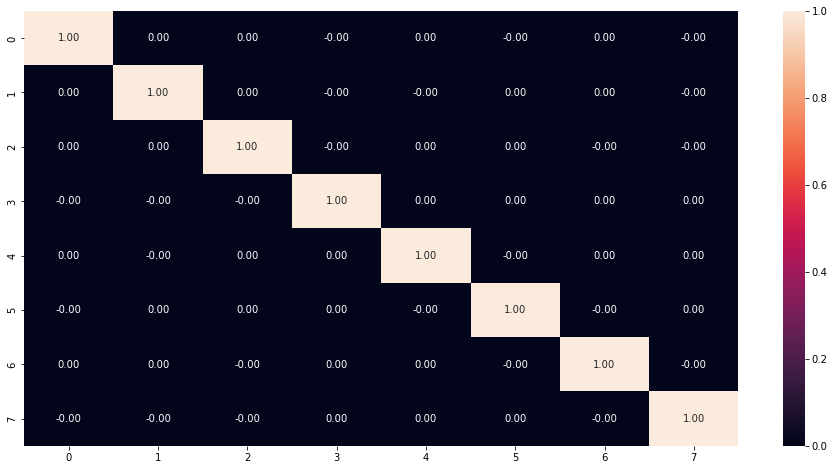

In [62]:
plt.figure(figsize= (16, 8))
sns.heatmap(pca_x.corr(), annot = True, fmt= '.2f');

From the above correlation table and below pairplot we deduce that there is no correlation between the features

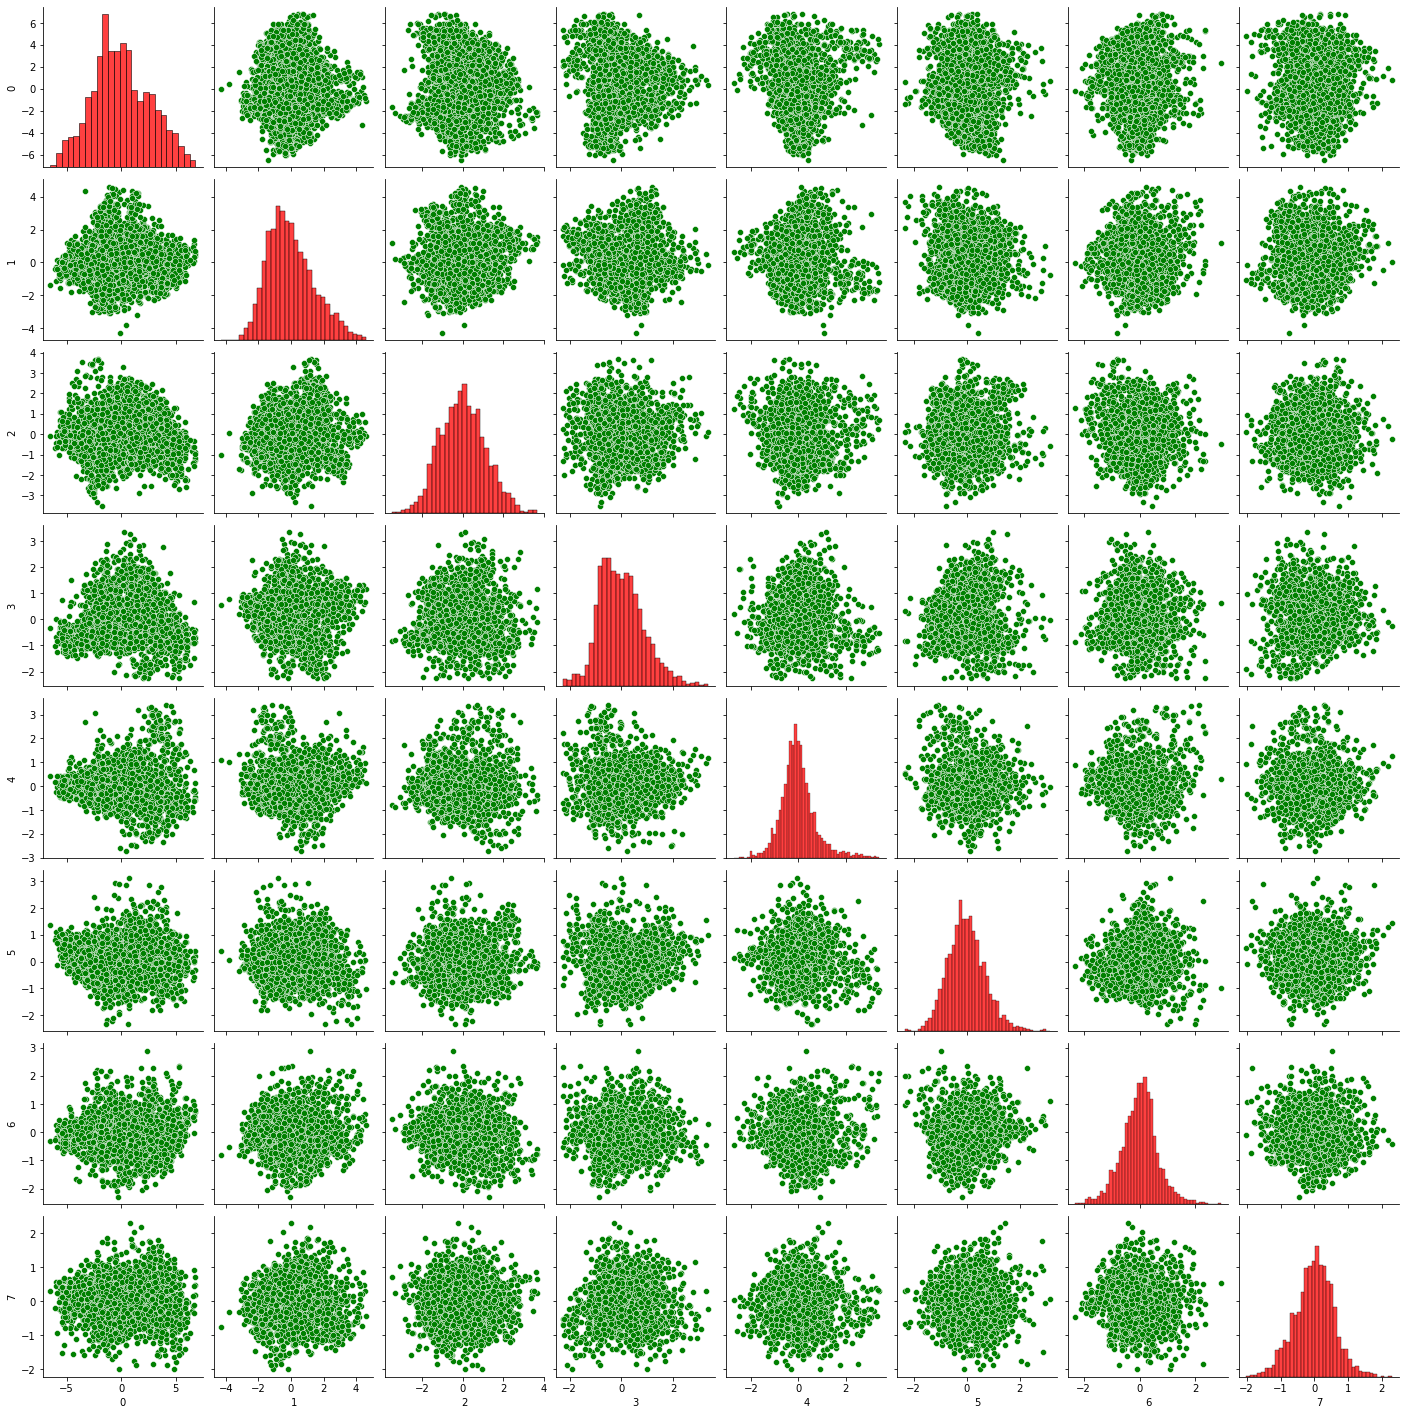

In [63]:
sns.pairplot(data=pca_x,diag_kind='hist',diag_kws={'color':'red'},plot_kws={'color':'green'})

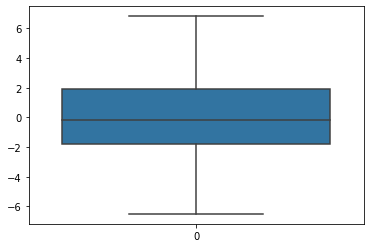

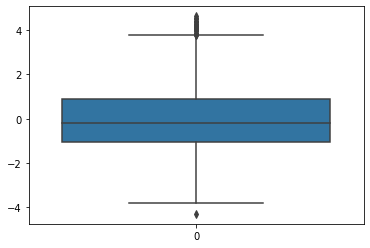

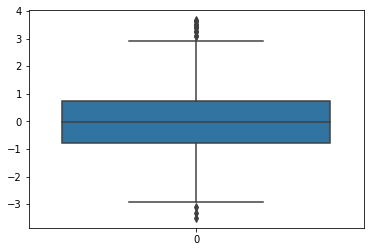

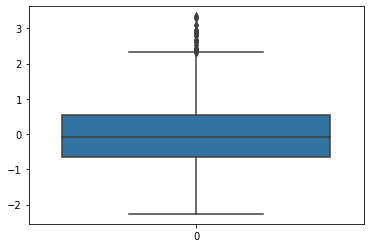

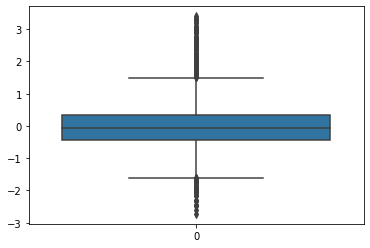

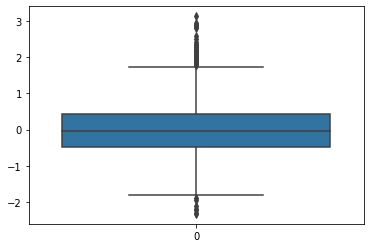

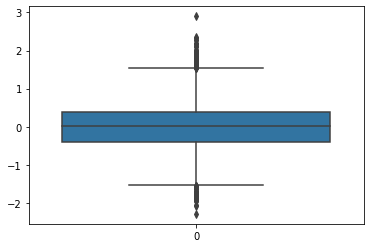

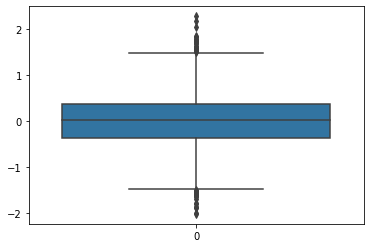

In [66]:
for i in pca_x.columns:
    sns.boxplot(data=pca_x[i])
    plt.subplot()
    plt.show()    

removing the outliers from each column

In [34]:
pca_x.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

SVM

In [82]:
parameterspc1=[{'gamma':[0.01,0.1,0.5,0.8,1,10],'C':[int(i) for i in np.linspace(start=1,stop=100,num=11)]}]

In [83]:
gridpc2=GridSearchCV(clf,param_grid=parameterspc1,cv=4,verbose=1)

In [84]:
gridpc2.fit(xxtrain,yytrain)

Fitting 4 folds for each of 66 candidates, totalling 264 fits


GridSearchCV(cv=4, estimator=SVC(random_state=0),
             param_grid=[{'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                          'gamma': [0.01, 0.1, 0.5, 0.8, 1, 10]}],
             verbose=1)

In [85]:
gridpc2.best_estimator_

SVC(C=1, gamma=0.1, random_state=0)

In [86]:
xxtrain,xxtest,yytrain,yytest=train_test_split(pca_x,y,random_state=42)
ccc=SVC(gamma=0.1,C=1,random_state=0)
ccc.fit(xxtrain,yytrain)
pca_pred=ccc.predict(xxtest)
accuracy_score(yytest,pca_pred)

0.9709595959595959

In [87]:
confusion_matrix(yytest,pca_pred)

array([[355,  12],
       [ 11, 414]], dtype=int64)

In [88]:
print(classification_report(yytest,pca_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       367
           1       0.97      0.97      0.97       425

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



RandomForest

In [93]:
Rparamspc2=[{'n_estimators':[int(i) for i in np.linspace(100,1000,num=7)],'max_depth':[int(x) for x in np.linspace(10,1000,num=11)]}]

In [94]:
gridpc3=GridSearchCV(RC,param_grid=Rparamspc2,cv=4,verbose=1)

In [95]:
gridpc3.fit(xxtrain,yytrain)

Fitting 4 folds for each of 77 candidates, totalling 308 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 109, 208, 307, 406, 505, 604, 703,
                                        802, 901, 1000],
                          'n_estimators': [100, 250, 400, 550, 700, 850,
                                           1000]}],
             verbose=1)

In [96]:
gridpc3.best_estimator_

RandomForestClassifier(max_depth=901, n_estimators=700)

In [100]:
RC2=RandomForestClassifier(max_depth=901, n_estimators=700)
RC2.fit(xxtrain,yytrain)

RandomForestClassifier(max_depth=901, n_estimators=700)

In [101]:
accuracy_score(RC2.predict(xxtest),yytest)

0.9633838383838383

In [115]:
paramsspc3 = {'max_leaf_nodes': list(range(2, 101,2)),'max_depth':[int(x) for x in np.linspace(10,1000,num=11)],'criterion':['gini','log_loss','entropy']}

In [116]:
griddpc4=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=paramsspc3,cv=4,verbose=1)

In [117]:
griddpc4.fit(xxtrain,yytrain)

Fitting 4 folds for each of 1650 candidates, totalling 6600 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': [10, 109, 208, 307, 406, 505, 604, 703,
                                       802, 901, 1000],
                         'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                            22, 24, 26, 28, 30, 32, 34, 36, 38,
                                            40, 42, 44, 46, 48, 50, 52, 54, 56,
                                            58, 60, ...]},
             verbose=1)

In [118]:
griddpc4.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=901, max_leaf_nodes=98)

In [129]:
dt2=DecisionTreeClassifier(criterion='log_loss', max_depth=901, max_leaf_nodes=98)

In [130]:
dt2.fit(xxtrain,yytrain)

DecisionTreeClassifier(criterion='log_loss', max_depth=901, max_leaf_nodes=98)

In [131]:
accuracy_score(dt2.predict(xxtest),yytest)

0.9305555555555556

In [132]:
Xgparamspc5=[{'n_estimators':[int(i) for i in np.linspace(100,1000,num=7)],'max_depth':[int(x) for x in np.linspace(1,1000,num=11)]}]

In [133]:
gridpc5=GridSearchCV(clg,param_grid=Xgparamspc5,cv=4,verbose=1)

In [134]:
gridpc5.fit(xxtrain,yytrain)

Fitting 4 folds for each of 77 candidates, totalling 308 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=3, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             param_grid=[{'max_depth': [1, 100, 200, 300, 400, 500, 600, 700,
                                        800, 900, 1000],
                          'n_estimators': [100, 250, 400, 550, 700, 850,
                                           1000]}],
             verbose=1)

In [135]:
gridpc5.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [136]:
clg2 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [137]:
clg2.fit(xxtrain,yytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [138]:
accuracy_score(clg2.predict(xxtest),yytest)

0.9583333333333334

## Xgboost

In [40]:
import xgboost as xgb
clg = xgb.XGBClassifier(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3)
clg.fit(xtrainnew,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
predxg=clg.predict(xtestnew)

In [43]:
accuracy_score(ytest,predxg)

0.9848484848484849

In [65]:
Xgparams=[{'n_estimators':[int(i) for i in np.linspace(100,1000,num=7)],'max_depth':[int(x) for x in np.linspace(1,1000,num=11)]}]

In [66]:
grid3=GridSearchCV(clg,param_grid=Xgparams,cv=4,verbose=1)

In [67]:
grid3.fit(xtrainnew,ytrain)

Fitting 4 folds for each of 77 candidates, totalling 308 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=3, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             param_grid=[{'max_depth': [1, 100, 200, 300, 400, 500, 600, 700,
                                        800, 900, 1000],
                          'n_estimators': [100, 250, 400, 550, 700, 850,
                                           1000]}],
             verbose=1)

In [68]:
grid3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
xgbg=xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [45]:
xgbg.fit(xtrainnew,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [46]:
accuracy_score(xgbg.predict(xtestnew),ytest)

0.9848484848484849

In [47]:
confusion_matrix(ytest,xgbg.predict(xtestnew))

array([[377,   3],
       [  9, 403]], dtype=int64)

In [60]:
[int(i) for i in np.linspace(100,1000,num=7)]

[100, 250, 400, 550, 700, 850, 1000]

In [64]:
[int(x) for x in np.linspace(1,1000,num=11)]

[1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

## Recursive Feature Elimination

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.feature_selection import RFE

In [76]:
selector=RFE(RandomForestClassifier(),verbose=1)

In [77]:
selector.fit(x,y)

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=RandomForestClassifier(), verbose=1)

In [78]:
selector.ranking_

array([ 1,  1,  2,  1,  6,  1,  5,  7,  1,  1,  1,  1,  1,  3, 11,  8, 10,
        1,  4,  9])

In [79]:
selector.support_

array([ True,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False])

In [80]:
Xr=selector.transform(x)

In [81]:
Xr

array([[-4.04860892,  0.42728785, -2.57569502, ..., -4.04860892,
        -1.81175223, -1.43119571],
       [-3.84044697,  0.61157295, -2.48649199, ..., -3.84044697,
        -1.07942402, -1.41788332],
       [-3.46251985,  1.60359475, -2.70655922, ..., -3.46251985,
        -1.36515237, -1.42897698],
       ...,
       [-1.29856826,  2.32235693, -2.1986923 , ..., -1.29856826,
         2.07745307, -0.59917151],
       [-1.24500526,  2.01187839, -1.99153766, ..., -1.24500526,
         0.91530045, -0.41279809],
       [-0.51466501,  2.14731212, -1.44586072, ..., -0.51466501,
         1.32490168, -1.27588453]])

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Xr,y)

In [83]:
from sklearn.svm import SVC

In [84]:
parameters=[{'gamma':[0.01,0.1,0.5,0.8,1,10],'C':[int(i) for i in np.linspace(start=1,stop=100,num=11)]}]

In [85]:
gridr1=GridSearchCV(SVC(),param_grid=parameters,verbose=1,cv=4)

In [86]:
gridr1.fit(X_train,Y_train)

Fitting 4 folds for each of 66 candidates, totalling 264 fits


GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                          'gamma': [0.01, 0.1, 0.5, 0.8, 1, 10]}],
             verbose=1)

In [87]:
gridr1.best_estimator_

SVC(C=1, gamma=1)

In [88]:
svv=SVC(C=1,gamma=1)

In [89]:
svv.fit(X_train,Y_train)

SVC(C=1, gamma=1)

In [90]:
pp=svv.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [92]:
accuracy_score(Y_test,pp)

0.9861111111111112

In [94]:
parameter2=[{'n_estimators':[int(i) for i in np.linspace(100,1000,num=6)],'max_depth':[int(x) for x in np.linspace(10,100,num=5)],'min_samples_leaf':[1,2,4]}]

In [95]:
gridr2=GridSearchCV(estimator=RandomForestClassifier(),cv=4,verbose=1,param_grid=parameter2)

In [96]:
gridr2.fit(X_train,Y_train)

Fitting 4 folds for each of 90 candidates, totalling 360 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 32, 55, 77, 100],
                          'min_samples_leaf': [1, 2, 4],
                          'n_estimators': [100, 280, 460, 640, 820, 1000]}],
             verbose=1)

In [97]:
gridr2.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=280)

In [98]:
rcr=RandomForestClassifier(max_depth=10,n_estimators=280)

In [99]:
rcr.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, n_estimators=280)

In [100]:
pp2=rcr.predict(X_test)

In [101]:
accuracy_score(Y_test,pp2)

0.9810606060606061

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
parameters3=[ {'max_leaf_nodes': list(range(2, 101,2)),'max_depth':[int(x) for x in np.linspace(10,100,num=10)],'criterion':['gini','log_loss','entropy']}]

In [104]:
gridr3=GridSearchCV(DecisionTreeClassifier(),verbose=1,cv=4,param_grid=parameters3)

In [106]:
gridr3.fit(X_train,Y_train)

Fitting 4 folds for each of 1500 candidates, totalling 6000 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'log_loss', 'entropy'],
                          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                          'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                             22, 24, 26, 28, 30, 32, 34, 36, 38,
                                             40, 42, 44, 46, 48, 50, 52, 54, 56,
                                             58, 60, ...]}],
             verbose=1)

In [107]:
gridr3.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=12)

In [108]:
dtcr=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=12)

In [110]:
dtcr.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=12)

In [111]:
pp3=dtcr.predict(X_test)

In [112]:
accuracy_score(pp3,Y_test)

0.9785353535353535

In [113]:
import xgboost as xgbb

In [114]:
parameters4=[{'n_estimators':[int(i) for i in np.linspace(100,1000,num=7)],'max_depth':[int(x) for x in np.linspace(1,1000,num=11)]}]

In [117]:
gridr4=GridSearchCV(xgbb.XGBClassifier(),verbose=1,cv=4,param_grid=parameters4)

In [118]:
gridr4.fit(X_train,Y_train)

Fitting 4 folds for each of 77 candidates, totalling 308 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid=[{'max_depth': [1, 100, 200, 300, 400, 500, 600, 700,
                                        800, 900, 1000],
                          'n_estimators': [100, 250, 400, 550, 700, 850,
                                           1000]}],
             verbose=1)

In [119]:
gridr4.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [120]:
xgg=xgbb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [121]:
xgg.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [122]:
pp4=xgg.predict(X_test)

In [123]:
accuracy_score(Y_test,pp4)

0.9810606060606061